In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [3]:
p = cogsworth.pop.Population(1000, use_default_BSE_settings=True)
p.create_population()
p.get_observables(filters=["G"], ignore_extinction=True,
                  assume_mw_galactocentric=True)

Run for 1000 binaries
Ended up with 1279 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries
[0.8s] Evolve binaries (run COSMIC)


1285it [00:06, 207.23it/s]                                                                                                                       


[8.6s] Get orbits (run gala)
Overall: 9.4s


,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,G_app_1,G_app_2,teff_obs,log_g_obs,secondary_brighter,G_abs_1,G_abs_2
0,0.0,0.0,9.771907,24.083773,9.929757,24.241623,24.055988,inf,3556.078113,4.992234,False,9.744122,inf
1,0.0,0.0,11.002032,25.477228,11.980730,26.455925,26.470037,inf,3066.498116,5.036208,False,11.994841,inf
2,0.0,0.0,11.359025,26.635834,11.546659,26.823468,27.158292,inf,3089.923956,5.116781,False,11.881483,inf
3,0.0,0.0,11.069117,26.347430,12.277083,27.555396,27.237612,inf,3158.480195,5.084514,False,11.959298,inf
4,0.0,0.0,6.253484,18.089072,10.336182,22.171770,18.148854,inf,4788.045549,4.593734,False,6.313266,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,9.691306,23.137278,11.115643,24.561615,23.509186,inf,3615.530267,4.994344,False,10.063214,inf
1275,0.0,0.0,9.178881,23.358857,12.174222,26.354197,23.979143,inf,3619.570907,4.928553,False,9.799168,inf
1276,0.0,0.0,9.792478,24.927654,10.341775,25.476951,25.247449,inf,3469.749495,4.976805,False,10.112272,inf
1277,0.0,0.0,8.815305,18.478840,9.226218,18.889752,18.477138,inf,3716.027566,4.896470,False,8.813603,inf


In [4]:
bound_prim_obs_nums, sec_obs_nums = p.get_gaia_observed_bin_nums(ra='auto',
                                                                 dec='auto')

In [5]:
obs_Gs = np.concatenate(
    (p.observables.loc[bound_prim_obs_nums]["G_app_1"].values,
     p.observables.loc[sec_obs_nums]["G_app_2"].values)
)
unobs_Gs = np.concatenate(
    (p.observables.loc[~p.observables.index.isin(bound_prim_obs_nums)]["G_app_1"].values,
     p.observables.loc[~p.observables.index.isin(sec_obs_nums)]["G_app_2"].values)
)

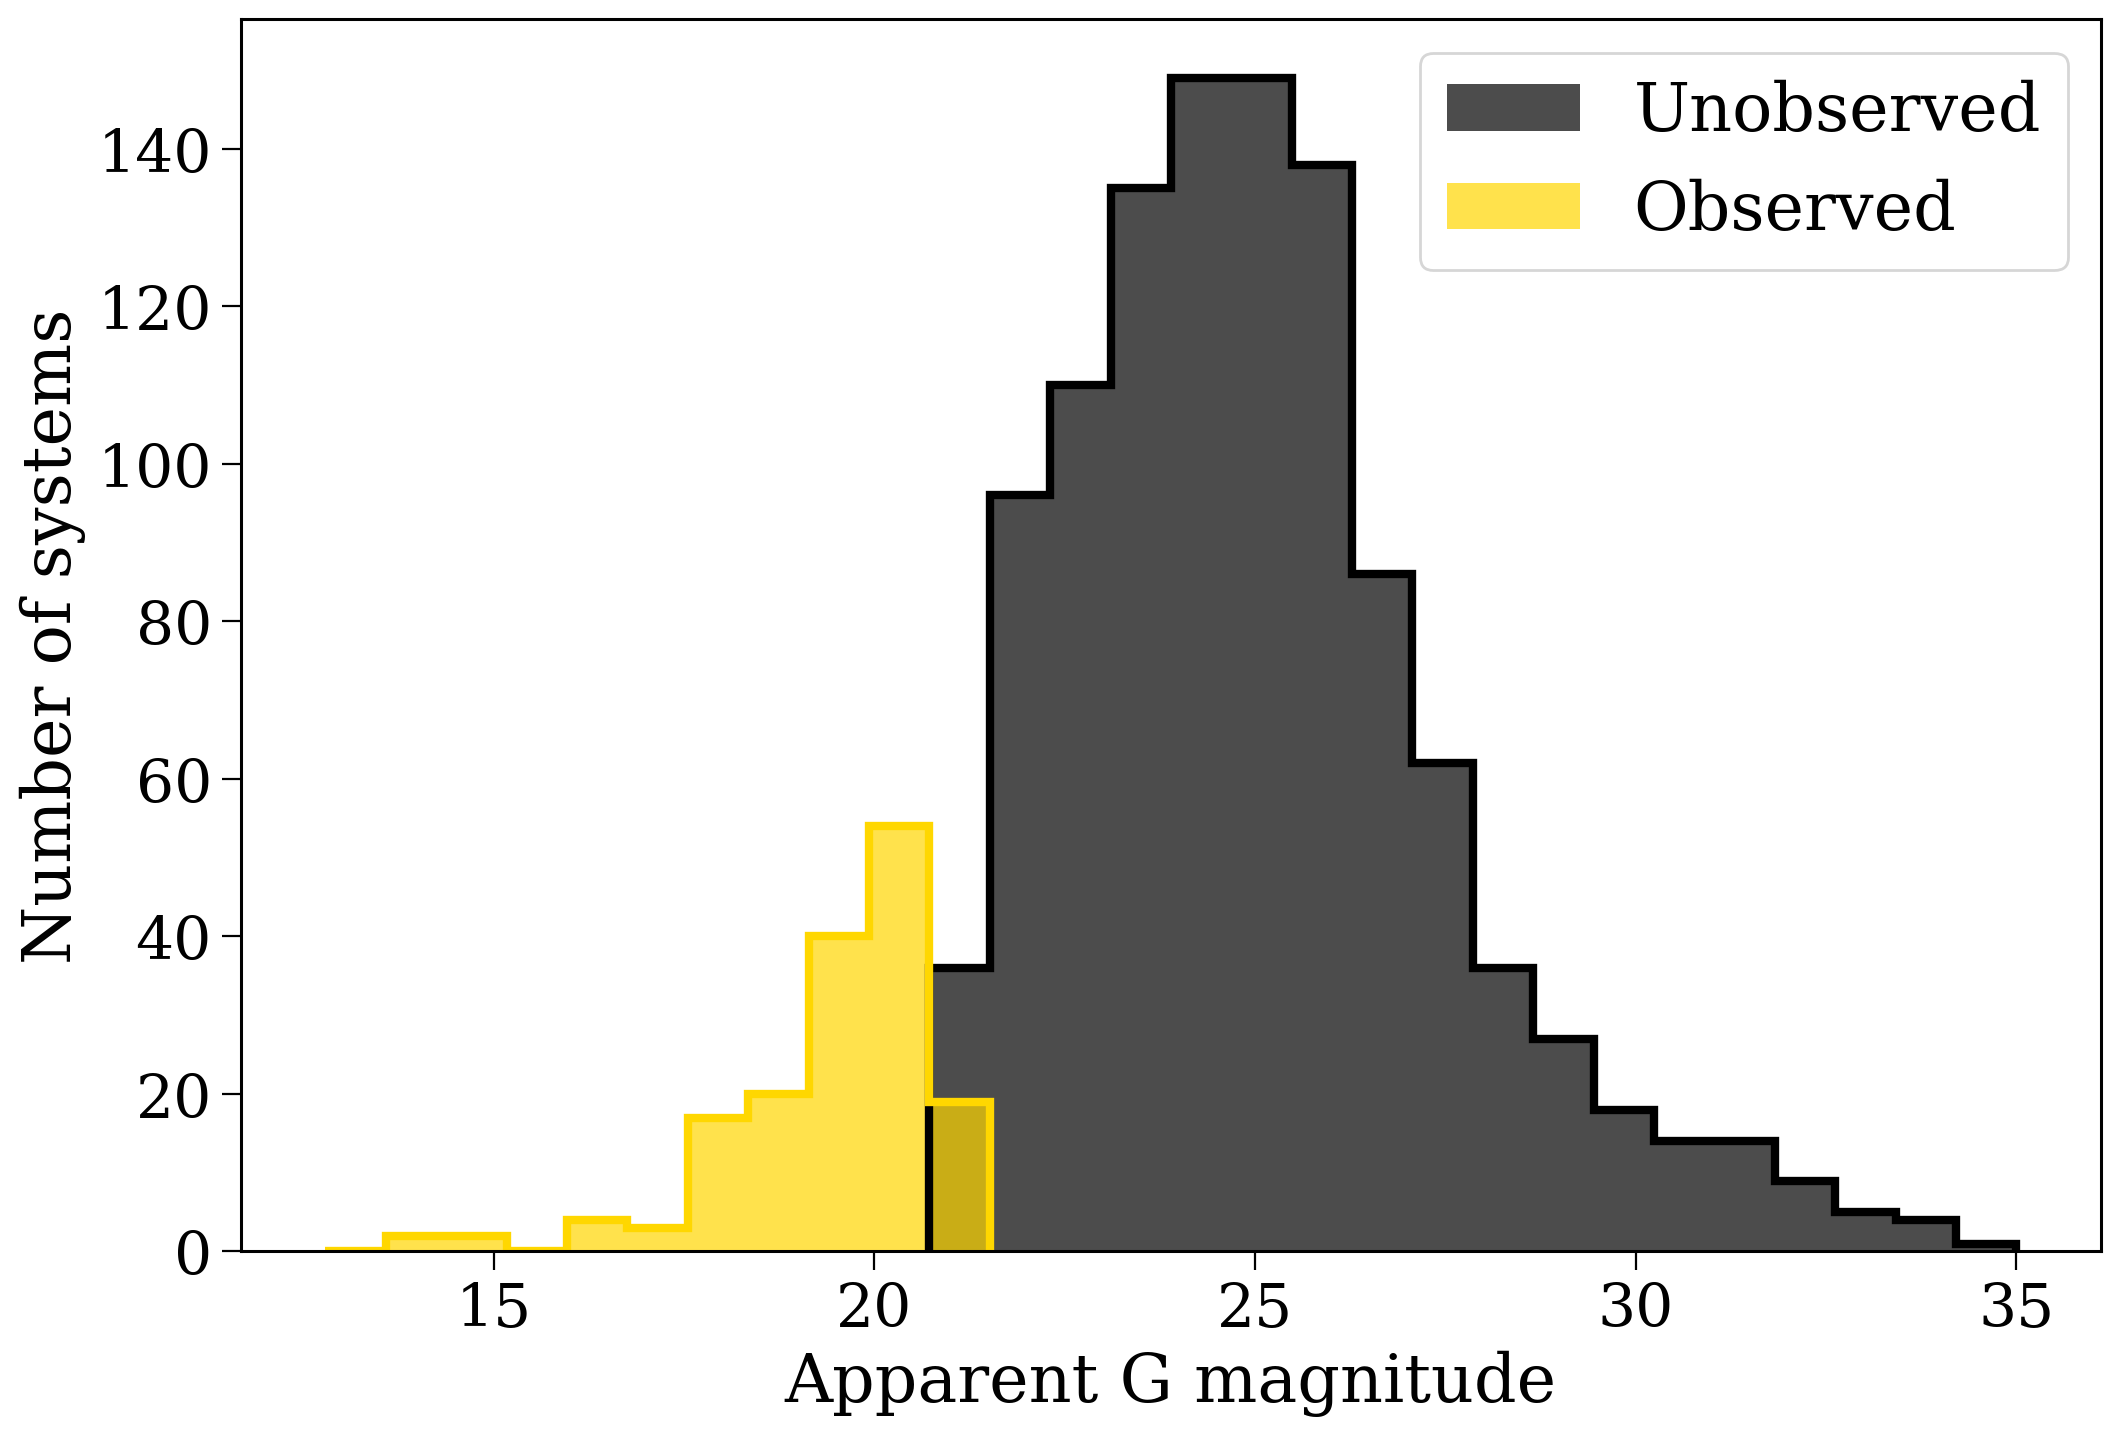

In [6]:
fig, ax = plt.subplots()

bins = np.linspace(12, 35, 30)
for G, colour, label in zip([unobs_Gs, obs_Gs],
                            ["black", "gold"],
                            ["Unobserved", "Observed"]):
    G = G[np.isfinite(G)]
    ax.hist(G, bins=bins[(bins > min(G) - 1) & (bins < max(G) + 1)],
            color=colour, alpha=0.7, label=label);
    ax.hist(G, bins=bins[(bins > min(G) - 1) & (bins < max(G) + 1)],
            color=colour, histtype="step", lw=3);
ax.legend()
ax.set(xlabel="Apparent G magnitude", ylabel="Number of systems")
plt.show()

In [7]:
f'Faintest observed magnitude: {obs_Gs.max():1.2f}'

'Faintest observed magnitude: 21.22'

In [8]:
f'Brightest unobserved magnitude: {unobs_Gs[~np.isnan(unobs_Gs)].min():1.2f}'

'Brightest unobserved magnitude: 20.94'